# **Sentiment Analysis Using SVM, Logistic Regression and Naive Bayes**

Yatri Rakholia

Sentiment Analysis is the process of classifying whether a block of text is positive, negative, or, neutral. Sentiment analysis is contextual mining of words which indicates the social sentiment of a brand. The goal which Sentiment analysis tries to gain is to analyze people’s opinion in a way that it can help the businesses expand. It focuses not only on polarity (positive, negative & neutral) but also on emotions (happy, sad, angry, etc.). 

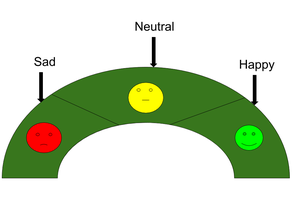

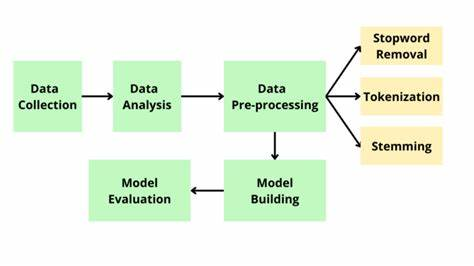

This is a project of twitter sentiment analysis using machine learning(Support Vector Machines,Naive Bayes, Logistic regression)

We know that Twitter is a social media platform. Here everyone can create an account and portrayed their own views. Apparently, we can see that the power of portraying independent views in social media is immeasurable but there are some bad sides too.

**DATASET:**
The dataset is based on the tweet of Indian Prime Minister Narendra Modi. By using this dataset we will identify the sentiment of common people. Here the number of the tweet is 1,62,981.

It contain two columns 
1. clean_text includes the tweets, 
2. category has sentiment as -1 is negative-sentiment tweets, 0 is neutral-sentiment tweets, 1 is positive-sentiment tweets


# **1. Data Preparation**

In [1]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
#import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression


In [2]:
#importing the dataset
data = pd.read_csv("../input/twitter-sentiment-dataset/Twitter_Data.csv")
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
#Shape of Dataset
data.shape

(162980, 2)

In [4]:
data.category.unique()

array([-1.,  0.,  1., nan])

In [5]:
#Check if dataset have any null values
data.isna().sum()

clean_text    4
category      7
dtype: int64

The dataset contains 4 null values in "clean_text" and 7 null values in "category".

In [6]:
#Displaying the null values in category column
data[data['category'].isna()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [7]:
#displaying null values in clean_text column
data[data['clean_text'].isna()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [8]:
#Dropping the Null values
data.drop(data[data['clean_text'].isna()].index, inplace=True)
data.drop(data[data['category'].isna()].index, inplace=True)
     

In [9]:
#Mapping the category as -1: negative,1: positive,0: neutral
sentiment_map={-1:'negative',1:'positive',0:'neutral'}
data.insert(2,'sentiment',[sentiment_map[s] for s in data.category],True)

data.head()

,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,negative
1,talk all the nonsense and continue all the dra...,0.0,neutral
2,what did just say vote for modi welcome bjp t...,1.0,positive
3,asking his supporters prefix chowkidar their n...,1.0,positive
4,answer who among these the most powerful world...,1.0,positive


# **2. Data Cleaning**

When preprocessing, you have to perform the following:

1.Eliminate handles and URLs

2.Tokenize the string into words.

3.Remove stop words like “and, is, a, on, etc.”

4.Stemming- or convert every word to its stem. Like a dancer, dancing, danced, becomes ‘danc’. You can use porter stemmer to take care of this.

5.Convert all your words to lower case.

**Natural Language Toolkit**: It has a lot of pre-trained models and corpora which helps us to analyze things very easily.


**Stop words:** are words that are so common they are basically ignored by typical tokenizers. By default, NLTK (Natural Language Toolkit) includes a list of 40 stop words, including: “a”, “an”, “the”, “of”, “in”, etc.


**re library:**  A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression

**Tokenization:** is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.


# **2. Data Cleaning**

In [10]:
from nltk.tokenize import RegexpTokenizer
import csv
import re
from string import punctuation

In [11]:
def preProcessor(Tweet):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', Tweet)
    text=re.sub(r'['+punctuation+']',' ',Tweet)
    text=re.sub(r'#(\w+)',' ',Tweet)
    text=re.sub(r'@(\w+)',' ',Tweet)
    #print(token.tokenize(text))
    return Tweet

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
text_counts=cv.fit_transform(data['clean_text'].values.astype('U'))

# **3. Data Visualization**

In [12]:
#labeling the 'clean_text' as reviews and 'sentiment' as labels.
reviews = np.array(data['clean_text'])[:]
labels = np.array(data['sentiment'])[:]

In [13]:
from collections import Counter
Counter(labels)

Counter({'negative': 35509, 'neutral': 55211, 'positive': 72249})

**1. Check the distrubution of data sentiments with help of Bar plot**

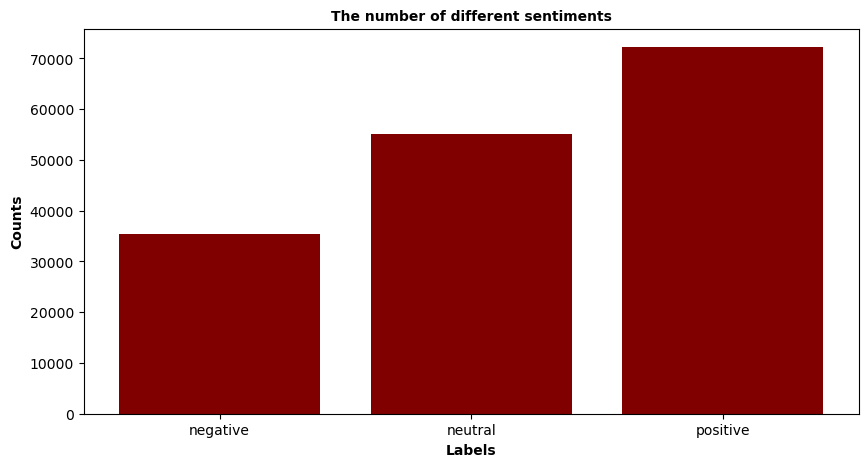

In [14]:
#to check if the classes are equally distributed
classes = data.category.unique()
counts = []
for i in classes:
    count = len(data[data.category == i])
    counts.append(count)
    
fig = plt.figure(figsize = (10, 5))   
plt.bar(['negative', 'neutral' ,'positive'], counts, color ='maroon' )
plt.xlabel("Labels", fontweight ='bold', fontsize = 10)
plt.ylabel("Counts", fontweight ='bold', fontsize = 10)
plt.title("The number of different sentiments", fontweight ='bold', fontsize = 10)
plt.show()

**2. Creating wordcloud for negative words**
(-1 = negative, 0 = neutral, 1 = positive)

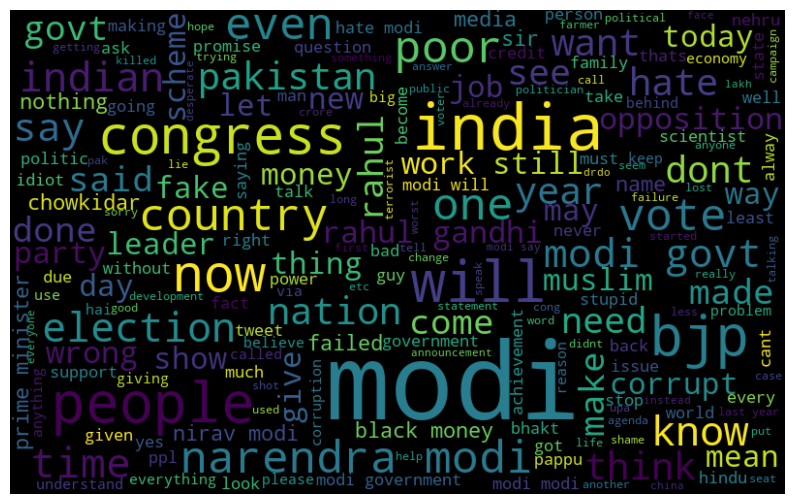

In [15]:
all_words = ' '.join([sentiment for sentiment in data['clean_text'][data['category'] == -1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**3. Creating wordcloud for positive words**

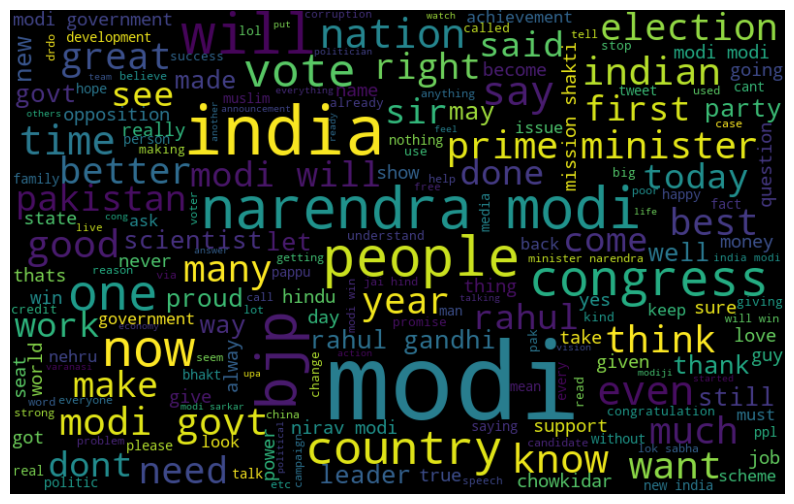

In [16]:
all_words = ' '.join([sentiment for sentiment in data['clean_text'][data['category'] == 1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **4. Model Building**

In [17]:
# split the dataset into training and testing  
from sklearn.model_selection import train_test_split
#training data= 70% testing data =30%
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)

# **Naive Bayes**

Naive Bayes is a probabilistic machine learning algorithm used for classification tasks. It is based on Bayes' theorem, which states that the probability of a hypothesis (in this case, a class label) given some observed evidence (features) is proportional to the probability of that evidence given the hypothesis, multiplied by the prior probability of the hypothesis.
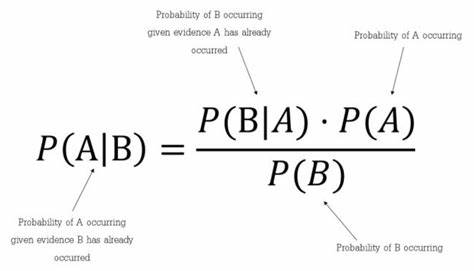

# **Naive Bayes**

In [18]:
#Ber_NB
from sklearn.naive_bayes import *
from sklearn import metrics

#training the model
ber_nb=BernoulliNB()
ber_nb.fit(x_train,y_train)

#prediction is carried on test data
NB_pred=ber_nb.predict(x_test)

#accuracy
metrics.accuracy_score(y_test, NB_pred)

0.7401975823771246

In [19]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

    negative       0.68      0.42      0.52     10787
     neutral       0.79      0.82      0.80     16491
    positive       0.72      0.84      0.78     21613

    accuracy                           0.74     48891
   macro avg       0.73      0.69      0.70     48891
weighted avg       0.74      0.74      0.73     48891



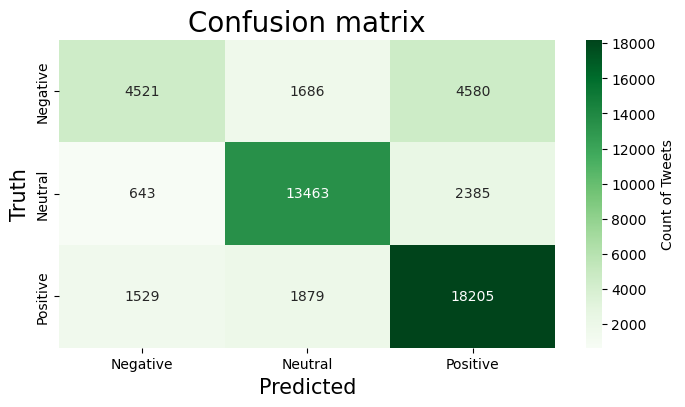

In [20]:
import seaborn as sb
# plot confusion matrix 
cm_naive = confusion_matrix(y_test,NB_pred)
plt.figure(figsize=(8,4))
sentiment_classes = ['Negative','Neutral', 'Positive']
sb.heatmap(cm_naive, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Count of Tweets'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

# **SVM**

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. 



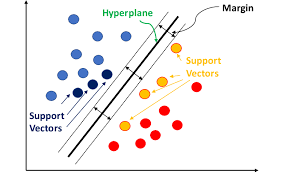

# **SVM**

In [21]:
from sklearn import svm

#training the model
SVM = svm.LinearSVC()
SVM.fit(x_train,y_train) 

#prediction is carried on test data
SVM_pred=SVM.predict(x_test)

#accuracy
metrics.accuracy_score(y_test, SVM_pred)

0.8541449346505492

In [22]:
print(classification_report(y_test,SVM_pred))

              precision    recall  f1-score   support

    negative       0.83      0.77      0.80     10787
     neutral       0.84      0.91      0.87     16491
    positive       0.88      0.85      0.87     21613

    accuracy                           0.85     48891
   macro avg       0.85      0.85      0.85     48891
weighted avg       0.85      0.85      0.85     48891



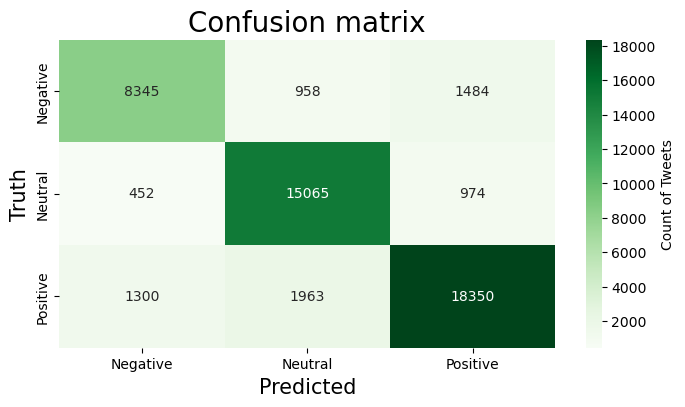

In [23]:
import seaborn as sb
# plot confusion matrix 
cm_svm = confusion_matrix(y_test,SVM_pred)
plt.figure(figsize=(8,4))
sentiment_classes = ['Negative','Neutral', 'Positive']
sb.heatmap(cm_svm, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Count of Tweets'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

# **Logistic Regression**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.


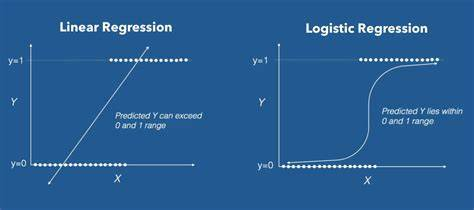

# **Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression

# training the model
LR = LogisticRegression(max_iter=1000)
LR.fit(x_train,y_train) 

#prediction is carried on test data
LR_pred=LR.predict(x_test) 

#accuracy
metrics.accuracy_score(y_test, LR_pred)

0.8615082530527091

In [25]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

    negative       0.85      0.77      0.81     10787
     neutral       0.83      0.94      0.88     16491
    positive       0.89      0.85      0.87     21613

    accuracy                           0.86     48891
   macro avg       0.86      0.85      0.85     48891
weighted avg       0.86      0.86      0.86     48891



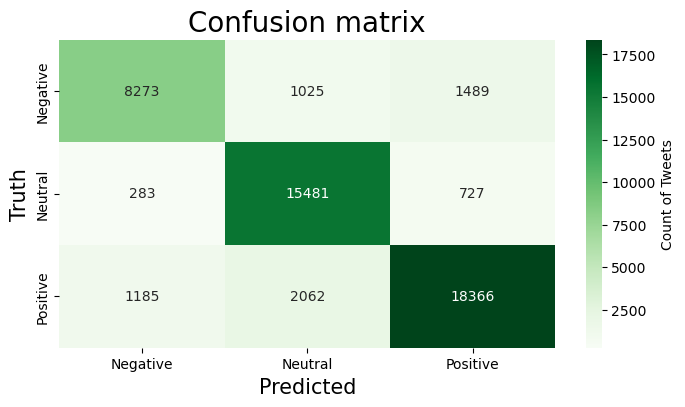

In [26]:
# plot confusion matrix 
cm_lr = confusion_matrix(y_test,LR_pred)
plt.figure(figsize=(8,4))
sentiment_classes = ['Negative','Neutral', 'Positive']
sb.heatmap(cm_lr, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Count of Tweets'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

# Observation
It can be observed from above **Logistic regression** has the highest accuracy of 86.64% while other two algorithm **SVM** and **Naive Bayes** has 85.63% and 73.82%.